### Temperature prediction using Deep Learning
The project attempts to predict the temperature of Sunnyvale using historical weather station data. The project would be considered a success if the predicted temperature is within $\pm 2^\circ$C of the Hourly temperature for 1-day

In [32]:
# The regular python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Import the meteostat library for acquring weather station data
import meteostat

In [87]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly

# Set time period for training
# We will train the model on slightly more than 1 year of data (14 months)
start = datetime(2021, 7, 1)
end = datetime(2022, 8, 31)
# Set the coordinates for sunnyvale
sunnyvale_lat = 37.3688  # + -> North, - -> South
sunnyvale_long = -122.0363 #+ -> East, - -> West
sunnyvale_alt = 38 #meters
sunnyvale = Point(sunnyvale_lat, sunnyvale_long, sunnyvale_alt)

In [39]:
# Let us look at the 5 nearby weatherstations
stations = meteostat.Stations()
stations = stations.nearby(sunnyvale_lat, sunnyvale_long)
station = stations.fetch(5)
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
74509,Moffett Field,US,CA,74509,KNUQ,37.4333,-122.0500,10.0,America/Los_Angeles,1973-01-01,2022-10-03,1945-03-01,2022-04-25,1945-01-01,2022-01-01,7273.454532
KSJC0,San Jose / Santa Clara Trailer Village,US,CA,<NA>,KSJC,37.3627,-121.9291,19.0,America/Los_Angeles,1973-01-01,2022-10-03,1973-01-01,2022-04-24,2000-01-01,2022-01-01,9498.074710
KPAO0,Palo Alto / Runnymeade (Historical),US,CA,<NA>,KPAO,37.4611,-122.1151,2.0,America/Los_Angeles,2006-01-01,2022-10-03,NaT,NaT,NaT,NaT,12400.337265
KRHV0,San Jose / Alum Rock,US,CA,<NA>,KRHV,37.3329,-121.8198,41.0,America/Los_Angeles,2006-01-01,2022-10-03,NaT,NaT,NaT,NaT,19548.944243
KSQL0,San Carlos / Silver Penny Mobile Home Park,US,CA,<NA>,KSQL,37.5119,-122.2495,2.0,America/Los_Angeles,2006-01-01,2022-10-03,2019-03-04,2022-04-24,2020-01-01,2022-01-01,24647.324282


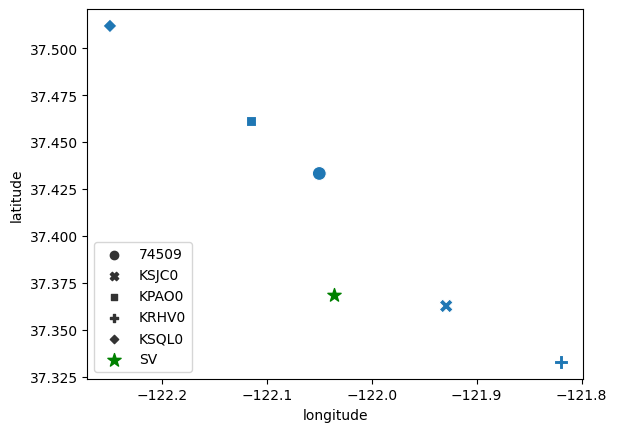

In [84]:
g = sns.scatterplot(data=station, x ="longitude",  y = "latitude", style='id', s=100)
# g.invert_yaxis()
plt.scatter(sunnyvale_long, sunnyvale_lat, marker='*', c='g', s=100, label='SV')
plt.legend(loc='lower left')

Based on the above visualization of the station location, we can use weighted approach to estimate weather information using **MOFFETT FIELD** and **SAN JOSE**

In [85]:
sunnyvale.method='weighted'
sunnyvale.max_count=2

In [187]:
# Fetch the yearly data
# Get daily data for 2018
data = Hourly(sunnyvale, start, end)
data = data.fetch()
data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2021-07-01 00:00:00,20.8,13.7,64.0,0.0,NaN,360.0,25.9,NaN,1012.0,NaN,NaN
2021-07-01 01:00:00,20.8,13.7,64.0,0.0,NaN,360.0,22.3,NaN,1013.0,NaN,NaN
2021-07-01 02:00:00,19.8,14.8,73.0,0.0,NaN,350.0,24.1,NaN,1013.0,NaN,NaN
2021-07-01 03:00:00,17.8,14.9,83.0,0.0,NaN,350.0,18.4,NaN,1013.0,NaN,NaN
2021-07-01 04:00:00,17.8,13.9,78.0,0.0,NaN,350.0,18.4,NaN,1013.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30 20:00:00,22.8,14.9,61.0,0.0,NaN,340.0,18.4,NaN,1016.0,NaN,1.0
2022-08-30 21:00:00,22.8,14.9,61.0,0.0,NaN,320.0,16.6,NaN,1015.0,NaN,1.0
2022-08-30 22:00:00,22.8,14.9,61.0,0.0,NaN,330.0,17.0,NaN,1015.0,NaN,1.0


In [188]:
data.info()
# Can drop snow, wpgt, tsun as they are all NaN values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10225 entries, 2021-07-01 00:00:00 to 2022-08-31 00:00:00
Freq: H
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    10225 non-null  float64
 1   dwpt    10225 non-null  float64
 2   rhum    10225 non-null  float64
 3   prcp    10225 non-null  float64
 4   snow    0 non-null      float64
 5   wdir    10225 non-null  float64
 6   wspd    10225 non-null  float64
 7   wpgt    0 non-null      float64
 8   pres    10225 non-null  float64
 9   tsun    0 non-null      float64
 10  coco    2799 non-null   float64
dtypes: float64(11)
memory usage: 958.6 KB


In [189]:
data.drop(columns=['snow', 'wpgt', 'tsun'], inplace=True)
data

,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
time,,,,,,,,
2021-07-01 00:00:00,20.8,13.7,64.0,0.0,360.0,25.9,1012.0,NaN
2021-07-01 01:00:00,20.8,13.7,64.0,0.0,360.0,22.3,1013.0,NaN
2021-07-01 02:00:00,19.8,14.8,73.0,0.0,350.0,24.1,1013.0,NaN
2021-07-01 03:00:00,17.8,14.9,83.0,0.0,350.0,18.4,1013.0,NaN
2021-07-01 04:00:00,17.8,13.9,78.0,0.0,350.0,18.4,1013.0,NaN
...,...,...,...,...,...,...,...,...
2022-08-30 20:00:00,22.8,14.9,61.0,0.0,340.0,18.4,1016.0,1.0
2022-08-30 21:00:00,22.8,14.9,61.0,0.0,320.0,16.6,1015.0,1.0
2022-08-30 22:00:00,22.8,14.9,61.0,0.0,330.0,17.0,1015.0,1.0


<AxesSubplot:xlabel='time', ylabel='temp'>

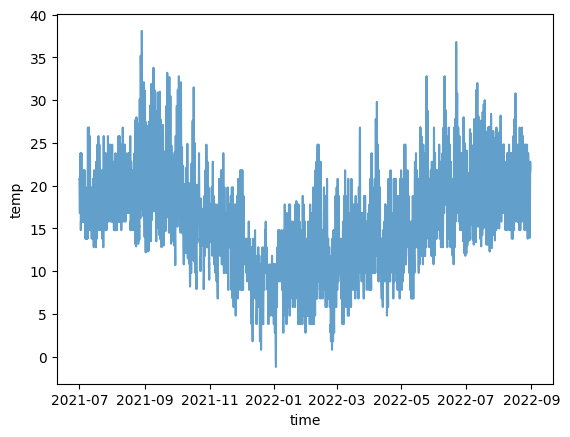

In [193]:
sns.lineplot(data=data, x='time', y='temp', alpha=0.7)

<AxesSubplot:xlabel='temp', ylabel='Count'>

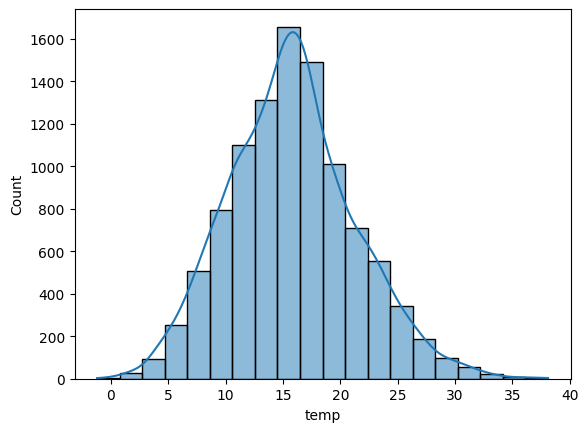

In [198]:
sns.histplot(data = data, x= "temp", kde=True, bins=20)

<AxesSubplot:xlabel='prcp', ylabel='Count'>

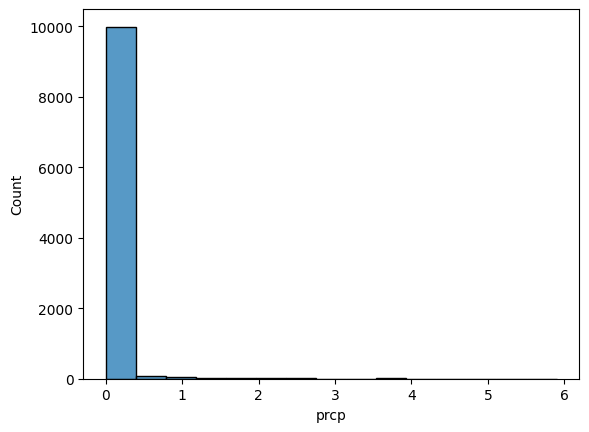

In [199]:
sns.histplot(data = data, x= "prcp")

In [200]:
# Since most days are rainless, let us look at the data with rain
rainday_data = data.loc[data['prcp'] > 0.]

In [201]:
rainday_data

,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
time,,,,,,,,
2021-09-10 13:00:00,17.7,13.8,78.0,0.1,239.0,7.2,1014.1,NaN
2021-10-09 07:00:00,13.6,10.2,80.0,0.1,204.0,4.7,1021.8,NaN
2021-10-18 02:00:00,15.5,9.6,68.0,0.2,217.0,9.7,1011.8,NaN
2021-10-18 03:00:00,14.5,9.9,74.0,2.1,240.0,6.1,1013.0,NaN
2021-10-18 04:00:00,14.1,10.5,79.0,2.0,283.0,11.2,1013.3,NaN
...,...,...,...,...,...,...,...,...
2022-06-05 19:00:00,23.8,16.8,65.0,0.2,0.0,0.0,1015.0,NaN
2022-07-05 19:00:00,24.6,15.5,57.0,0.2,313.0,9.7,1014.1,7.0
2022-07-05 20:00:00,25.2,15.5,55.0,0.2,312.0,14.0,1014.1,17.0


<AxesSubplot:xlabel='prcp', ylabel='Count'>

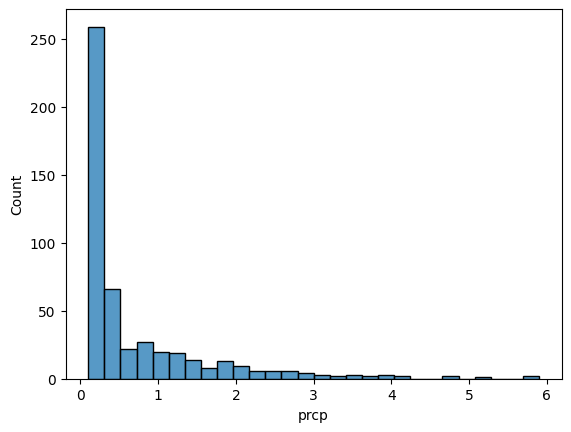

In [202]:
sns.histplot(data = rainday_data, x= "prcp")

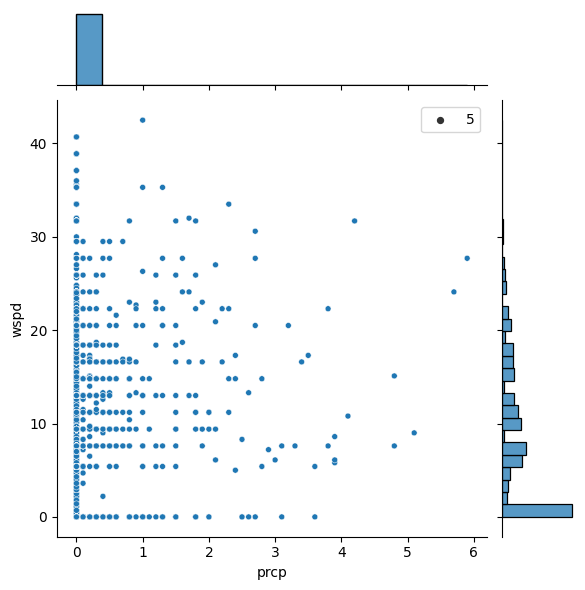

In [203]:
# Are rainy days more windy?
sns.jointplot(data = data , x = "prcp", y = "wspd", size=5)
# Not really

<AxesSubplot:>

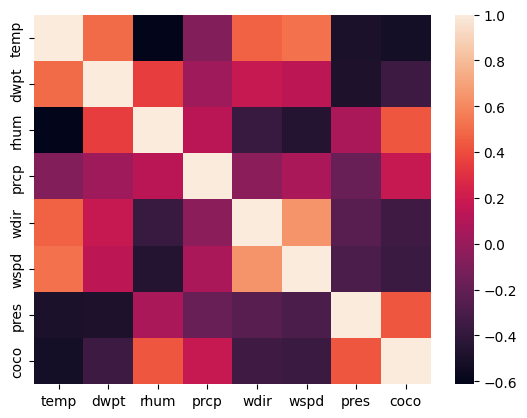

In [204]:
sns.heatmap(data.corr())

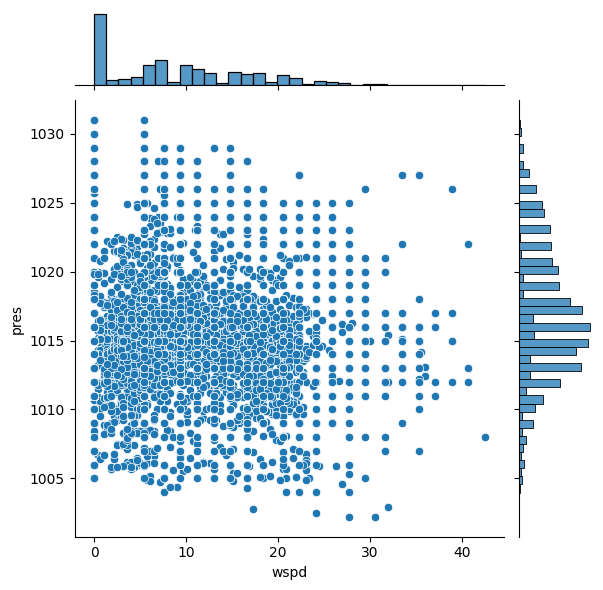

In [220]:
g = sns.jointplot(data = data , y = "pres", x = "wspd")

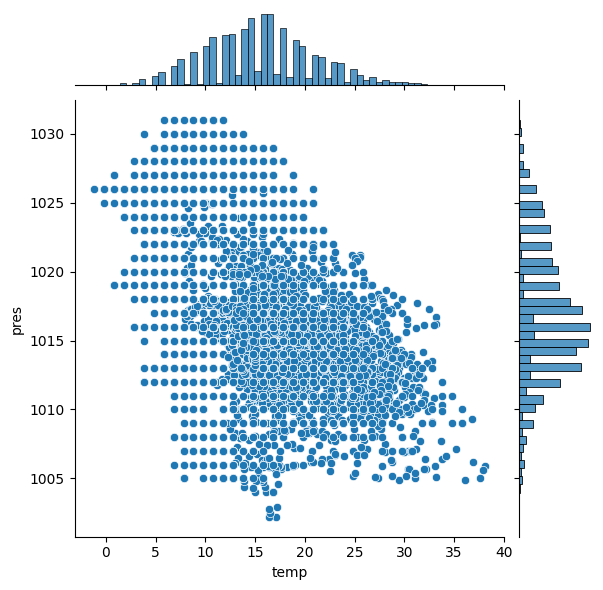

In [218]:
g = sns.jointplot(data = data , y = "pres", x = "temp")

In [226]:
# Let us explore the weather condition data
weather_condition = data['coco'].copy()

In [235]:
weather_condition.dropna(inplace=True)

In [236]:
# Let us look at the unique values of weather conditions for sunnyvale
weather_condition.unique()

array([ 5.,  3.,  2.,  1.,  7., 17.])

1 $\rightarrow$ Clear

2$\rightarrow$Fair

3$\rightarrow$Cloudy

5$\rightarrow$Fog

7$\rightarrow$Light Rain

17$\rightarrow$Rain Shower


In [237]:
weather_condition.value_counts()

1.0     1228
5.0      958
3.0      396
2.0      213
7.0        2
17.0       2
Name: coco, dtype: int64

Since only 2799 out of ~10000 hourly data points had weather condition information we can drop the column for our temperature prediction as there is no systematic way to impute the categorical values

In [238]:
data = data.drop(columns=['coco'])

In [239]:
data

,temp,dwpt,rhum,prcp,wdir,wspd,pres
time,,,,,,,
2021-07-01 00:00:00,20.8,13.7,64.0,0.0,360.0,25.9,1012.0
2021-07-01 01:00:00,20.8,13.7,64.0,0.0,360.0,22.3,1013.0
2021-07-01 02:00:00,19.8,14.8,73.0,0.0,350.0,24.1,1013.0
2021-07-01 03:00:00,17.8,14.9,83.0,0.0,350.0,18.4,1013.0
2021-07-01 04:00:00,17.8,13.9,78.0,0.0,350.0,18.4,1013.0
...,...,...,...,...,...,...,...
2022-08-30 20:00:00,22.8,14.9,61.0,0.0,340.0,18.4,1016.0
2022-08-30 21:00:00,22.8,14.9,61.0,0.0,320.0,16.6,1015.0
2022-08-30 22:00:00,22.8,14.9,61.0,0.0,330.0,17.0,1015.0
